# Model AirBnB Price - Linear Regression

### Jonathan Bustamante Osorio
### July 18, 2023

This project explores how features such as the number of bedrooms, room type, and guest accommodations impact AirBnB prices in Bangkok. The goal is to build and evaluate linear regression models to predict listing prices, using various transformations and additional variables to improve accuracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

### 1. Data Loading and Cleaning
Here, we load the AirBnB dataset, focusing on key features: bedrooms, price, accommodates, and room_type. After loading the data, we perform basic cleaning steps, including converting price to a numeric format and handling any missing values.

In [2]:
bkAirBnb = pd.read_csv("data/airbnb-bangkok-listings.csv.bz2", usecols=['bedrooms', 'price', 'accommodates', 'room_type'])

In [3]:
bkAirBnb.sample(3)

,room_type,accommodates,bedrooms,price
16515,Entire home/apt,3,2.0,"$1,199.00"
12640,Entire home/apt,2,1.0,$900.00
9069,Entire home/apt,2,NaN,$525.00


**Convert price to numeric and drop missing values:** 

In [4]:
bkAirBnb['price'] = pd.to_numeric(bkAirBnb['price'].str.replace(r'[\$,]', '', regex=True))
bkAirBnb = bkAirBnb.dropna()

### 2. Data Exploration

We explore the distribution of the price variable to understand whether it follows a normal distribution or requires transformation.

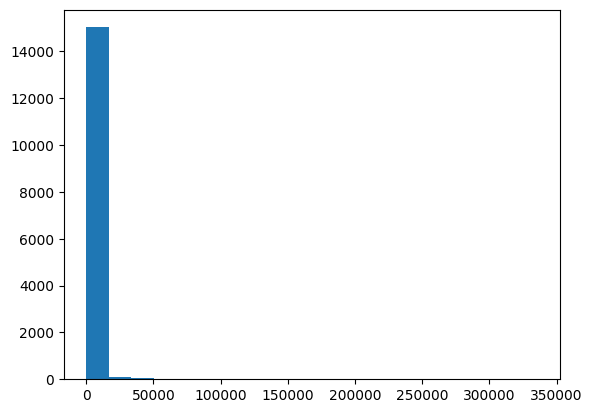

In [5]:
_ = plt.hist(bkAirBnb["price"], bins=20)

The following data shows that this should absolutely be normalized with a log transformation since all of the data is in one bin.

### 3. Feature Engineering: Bedrooms Categories

This step converts the bedrooms variable into a set of categories to make it easier to analyze price variations based on the number of bedrooms.

In [24]:
bkAirBnb["bedrooms2"] = pd.cut(bkAirBnb.bedrooms,
                           bins= [0, 1, 2, 3, 4, np.inf],
                           labels=["0", "1", "2", "3", "4+"],
                           right=False)

### 4. Linear Regression Model (Price)

Run a basic linear regression model that uses the bedrooms categories to predict price.

In [25]:
m = smf.ols("price ~ C(bedrooms2)", data=bkAirBnb).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     186.5
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          9.32e-119
Time:                        04:11:24   Log-Likelihood:            -1.5589e+05
No. Observations:               15200   AIC:                         3.118e+05
Df Residuals:                   15196   BIC:                         3.118e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3671.9265     91.945     39.936      0.000    3491.704    3852.149
C(bedrooms2)[T.1]  -1929.6576    104.107    -18.535      0.000   -2133.720   -1725.595
C(bedrooms2)[T.2]   -448.6545    145.358     -3.087      0.002    -733.573    -163.736
C(bedrooms2)[T.3]   1387.7093    239.380      5.797      0.000     918.495    1856.923
C(bedrooms2)[T.4+]  4662.5293    267.119     17.455      0.000    4138.944    5186.114
==============================================================================
Omnibus:                    36718.532   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        557010065.623
Skew:                          25.064   Prob(JB):                         0.00
Kurtosis:                     939.470   Cond. No.                     1.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The results tell us that airbnb's with 1 or 2 rooms tend to decrease in price, and 3 and above increase the price. However, since the R2 value of 0.036 is close to 0, it tells us that the price is not so dependent on these variables.

### 5. Linear Regression Model (Log Price)

We log-transform the price variable and run the regression model again. This transformation usually helps improve the fit by normalizing the skewed distribution of prices.

In [26]:
bkAirBnb['log_price'] = np.log(bkAirBnb['price'], where=bkAirBnb['price']>0)

In [27]:
m = smf.ols("log_price ~ C(bedrooms2)", data=bkAirBnb).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     1293.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:11:25   Log-Likelihood:                -16912.
No. Observations:               15200   AIC:                         3.383e+04
Df Residuals:                   15196   BIC:                         3.386e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.2469      0.010    635.204      0.000       6.228       6.266
C(bedrooms2)[T.1]      0.7682      0.011     68.986      0.000       0.746       0.790
C(bedrooms2)[T.2]      1.4462      0.016     93.020      0.000       1.416       1.477
C(bedrooms2)[T.3]      1.8930      0.026     73.935      0.000       1.843       1.943
C(bedrooms2)[T.4+]     2.1394      0.029     74.880      0.000       2.083       2.195
==============================================================================
Omnibus:                     3643.283   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16193.066
Skew:                           1.108   Prob(JB):                         0.00
Kurtosis:                       7.545   Cond. No.                     1.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The log-transformed model provides a much better fit (R-squared value of 0.203), meaning that using log-transformed prices explains more of the variance compared to the raw price model.

### 6. Extended Model with Room Type and Accommodates

We now add two more variables, room_type and accommodates, to our model to further improve prediction.

In [28]:
bkAirBnb["accommodates2"] = pd.cut(bkAirBnb.accommodates,
                           bins= [1, 2, 3, 4, np.inf],
                           labels=["1", "2", "3", "4 and more"],
                           right=False)

In [44]:
m = smf.ols("log_price ~ C(bedrooms2) + C(room_type) + C(accommodates2)", data=bkAirBnb).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     539.9
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:11:42   Log-Likelihood:                -16531.
No. Observations:               15200   AIC:                         3.308e+04
Df Residuals:                   15190   BIC:                         3.316e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          6.0518      0.027    221.322      0.000       5.998       6.105
C(bedrooms2)[T.1]                  0.8489      0.015     55.783      0.000       0.819       0.879
C(bedrooms2)[T.2]                  1.3575      0.017     80.222      0.000       1.324       1.391
C(bedrooms2)[T.3]                  1.7868      0.026     67.616      0.000       1.735       1.839
C(bedrooms2)[T.4+]                 2.0585      0.029     71.089      0.000       2.002       2.115
C(room_type)[T.Hotel room]         0.1332      0.028      4.827      0.000       0.079       0.187
C(room_type)[T.Private room]      -0.0583      0.013     -4.528      0.000      -0.084      -0.033
C(room_type)[T.Shared room]       -0.6869      0.033    -20.786      0.000      -0.752      -0.622
C(accommodates2)[T.2]              0.1417      0.032      4.466      0.000       0.080       0.204
C(accommodates2)[T.3]              0.2048      0.035      5.904      0.000       0.137       0.273
C(accommodates2)[T.4 and more]     0.3136      0.033      9.455      0.000       0.249       0.379
==============================================================================
Omnibus:                     4377.153   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22672.783
Skew:                           1.295   Prob(JB):                         0.00
Kurtosis:                       8.394   Cond. No.                     1.72e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.16e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

This extended model shows how room type and the number of people the listing accommodates influence price. While adding these variables improves the model, the R-squared value suggests that other factors may still play a role.

### 7. Predicting Prices

Using the extended model, we now predict the price (log-transformed) for each listing in the dataset. These predictions will be compared to the actual prices to assess model performance.

In [45]:
m.predict()

array([7.10549676, 6.98403336, 6.98403336, ..., 7.7229029 , 7.04236248,
       7.10549676])

### 8. Model Evaluation: RMSE
We calculate the Root Mean Squared Error (RMSE) to evaluate how close the predicted prices are to the actual prices.

In [47]:
actualPrice = bkAirBnb["price"]

In [48]:
predictedPrice = m.predict()

In [55]:
squared_diff = np.abs(predictedPrice - actualPrice)
mean_sd = squared_diff.mean()
rmse = np.sqrt(mean_sd)
rmse

47.714426767215066

This RMSE value indicates that, on average, the difference between the predicted and actual prices is about $47.71, meaning the model's predictions are reasonably close to the actual prices.

### 9. Price Prediction for a Specific Listing
Here, we manually predict the price for a 2-bedroom apartment that accommodates 4 guests using the coefficients from our model.

In [67]:
b0 = 6.0518
b1 = 1.3575
b2 = 0.3136

price = b0 + b1 + b2
price

7.7229

### 10. Comparing Predictions with Actual Data
We compute the average log price for 2-bedroom listings that accommodate 4 guests and compare it with our manual prediction to see how close we get.

In [71]:
a4 = bkAirBnb["accommodates"] == 4
br2 = bkAirBnb["bedrooms"] == 2.0

bkAirBnb[a4 & br2].log_price.mean()

7.728450922007445

The manually predicted log price (7.7229) is almost identical to the average log price in the dataset (7.728). This shows that the model's prediction is highly accurate for this type of listing. The small difference is likely due to rounding or slight variations in the dataset.